In [114]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [115]:
(X_train, y_train), (X_test,y_test) = datasets.fashion_mnist.load_data()
X_train.shape

(60000, 28, 28)

In [116]:
X_test.shape

(10000, 28, 28)

In [117]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [118]:
y_train.shape

(60000,)

In [119]:
y_train[0]

9

In [120]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [121]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [122]:
classes = ["Tshirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [123]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

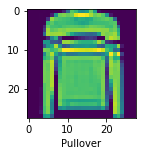

In [124]:
plot_sample(X_train, y_train, 5)

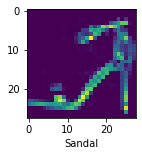

In [125]:
plot_sample(X_train, y_train, 8)

In [130]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [131]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [132]:
cnn.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_51 (Dense)             (None, 10)              

In [133]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [136]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

In [138]:
tf.config.run_functions_eagerly(True)

In [140]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
   3/1875 [..............................] - ETA: 1:26 - loss: 0.4242 - accuracy: 0.8438

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1875/1875 [==============================] - 87s 46ms/step - loss: 0.3356 - accuracy: 0.8802
Epoch 2/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2798 - accuracy: 0.8977
Epoch 3/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.2484 - accuracy: 0.9092
Epoch 4/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.2233 - accuracy: 0.9173
Epoch 5/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2005 - accuracy: 0.9254


In [142]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [143]:
cnn.evaluate(X_test,y_test)

  8/313 [..............................] - ETA: 5s - loss: 0.2811 - accuracy: 0.9180

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


313/313 [==============================] - 5s 16ms/step - loss: 0.2694 - accuracy: 0.9062


[0.26937419176101685, 0.9061999917030334]

In [144]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [145]:
y_pred = cnn.predict(X_test)
y_pred[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


array([[3.1515949e-08, 1.5236454e-08, 3.2518184e-07, 1.4144803e-06,
        1.3782248e-08, 6.5952248e-05, 2.9150615e-07, 5.6996272e-04,
        3.0939343e-06, 9.9935895e-01],
       [1.8482441e-06, 1.1687760e-14, 9.9999654e-01, 1.2061631e-09,
        4.8456246e-07, 9.3285297e-13, 1.0445318e-06, 9.5020508e-14,
        2.9228115e-12, 2.1795802e-13],
       [1.3346582e-06, 9.9999821e-01, 5.0892277e-09, 2.2800723e-08,
        1.6088185e-08, 3.5863093e-13, 4.0969016e-07, 5.9907599e-19,
        1.2824770e-10, 7.5685655e-16],
       [5.3508774e-07, 9.9999321e-01, 1.0722717e-07, 5.4573743e-06,
        2.9945309e-07, 3.1077134e-11, 4.0249421e-07, 3.2752136e-15,
        2.6857702e-11, 2.2259180e-12],
       [1.1266682e-01, 5.2556817e-07, 3.6756188e-02, 3.2420121e-03,
        2.1651410e-02, 2.9703085e-06, 8.2567894e-01, 2.1190033e-08,
        1.1020527e-06, 1.0253561e-07]], dtype=float32)

In [146]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[9, 2, 1, 1, 6]

In [151]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

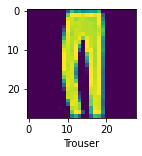

In [152]:
plot_sample(X_test, y_test, 2)

In [153]:
classes[y_classes[2]]

'Trouser'